# WIP
## To Do
- Experiment with different cross validation techniques from https://github.com/MaartenGr/validation/blob/master/Validation.ipynb
- Test model using tests - e.g. https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7
- hyperparameter tuning -  https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide
- regularisation

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [2]:
def load_data(bin=False):
    project_dir = os.path.dirname(os.path.abspath(''))
    df = pd.read_json(os.path.join(project_dir, 'model_prepped_dataset.json'))
    X = df.loc[:, ~df.columns.isin(['Outcome', 'Outcome_Bin_H'])]
    if bin:
        y = df['Outcome_Bin_H']
    else:
        y = df['Outcome']
    return X, y

def prep_datasets(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def compare_models(models, X_train, y_train, y_test):
    for model in models:
        model[1].fit(X_train, y_train)
        y_pred = model[1].predict(X_test)
        accu = accuracy_score(y_test, y_pred) * 100
        print(
            f"{model[0]}: "
            f"Accuracy: {accu:.2f}"
            )
    return

In [3]:
np.random.seed(2)

models = [
    ('lgr', make_pipeline(StandardScaler(), LogisticRegression())),
    ('rfc', RandomForestClassifier(max_depth=2)),
    ('knn', KNeighborsClassifier()),
    ('dtc', DecisionTreeClassifier()),
    ('abc', AdaBoostClassifier()),
    ('gbc', GradientBoostingClassifier())
    ]

X, y = load_data(bin=True)
X_train, X_test, y_train, y_test = prep_datasets(X, y)
compare_models(models, X_train, y_train, y_test)

lgr: Accuracy: 61.20
rfc: Accuracy: 59.29
knn: Accuracy: 56.98
dtc: Accuracy: 53.86
abc: Accuracy: 60.66
gbc: Accuracy: 61.29


<BarContainer object of 18 artists>

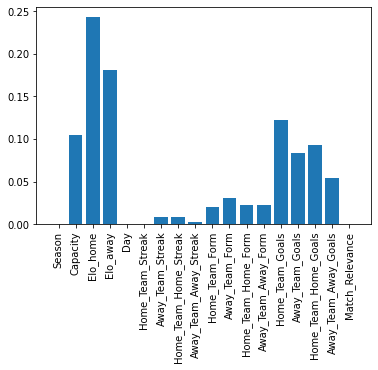

In [4]:
from matplotlib import pyplot as plt
plt.xticks(rotation=90)
plt.bar(list(X), models[1][1].feature_importances_)